# &#x1F4D1; &nbsp; $\mathfrak {\color{#338DD4} {P1: \ Predicting \ Boston \ Housing \ Prices}}$

## $\mathfrak {\color{#338DD4} {1. \ References}}$
#### Dataset
*Origin:* This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

*Creators:* Harrison, D. and Rubinfeld, D.L. 

*Data Set Information:* Concerns housing values in suburbs of Boston.

*Attribute Information:*

- CRIM: per capita crime rate by town 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS: proportion of non-retail business acres per town 
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX: nitric oxides concentration (parts per 10 million) 
- RM: average number of rooms per dwelling 
- AGE: proportion of owner-occupied units built prior to 1940 
- DIS: weighted distances to five Boston employment centres 
- RAD: index of accessibility to radial highways 
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population 
- MEDV: Median value of owner-occupied homes in 1000 USD

#### Resources

Housing Data Set: https://archive.ics.uci.edu/ml/datasets/Housing



## $\mathfrak {\color{#338DD4} {2.\ Code \ Library}}$

In [2]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input style="color: #338DD4; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [4]:
hide_code
# Load libraries
import numpy as np
import pylab as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

################################
### ADD EXTRA LIBRARIES HERE ###
################################
import pandas as pd
import warnings
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn import grid_search

# Make matplotlib show our plots inline 
%matplotlib inline

## $\mathfrak {\color{#338DD4} { 3. \ Statistical\ Analysis \ and \ Data \ Exploration}}$
#### 3.1 Data Loading

In [10]:
hide_code
# Create our client's feature set for which we will be predicting a selling price
client_features = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
# Load the Boston Housing dataset into the city_data variable
boston_data = datasets.load_boston()
prices = boston_data.target
features = boston_data.data

boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['PRICES'] = boston_data.target
print ("Boston Housing dataset loaded successfully!")

Boston Housing dataset loaded successfully!


In [11]:
hide_code
boston_data['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [13]:
hide_code
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 3.2 Requested Statistics
In this section of the project, we will quickly investigate a few basic statistics about the dataset we are working with. 

In addition, we will have look at the client's feature set in ***client_features*** and see how this particular sample relates to the features of the dataset.

In [128]:
hide_code
print ("Boston Housing Dataset Statistics (prices in $1000's): \n")
print ("Number of houses = ", len(prices))
print ("Number of features = ", len(features[0]))
print ("Minimum house price = ", np.min(prices))
print ("Maximum house price = ", np.max(prices))
print ("Mean house price = ", "%.2f" % np.mean(prices))
print ("Median house price = ", "%.2f" % np.median(prices))
print ("Standard deviation of house prices =", "%.4f" % np.std(prices))

Boston Housing Dataset Statistics (prices in $1000's): 

Number of houses =  506
Number of features =  13
Minimum house price =  5.0
Maximum house price =  50.0
Mean house price =  22.53
Median house price =  21.20
Standard deviation of house prices = 9.1880


#### Question 1
Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.

#### Answer 1
The most influential features could be:

- RM: average number of rooms per dwelling (shows the level of home comfort);
- RAD: index of accessibility to radial highways (sets the daily transport expenses of time and money to reach employment, shopping, educational and medical centers),
- LSTAT: % lower status of the population (indicates the level of social environment comfort).

Two features were plotted with the least squares regression fitted line as an example.

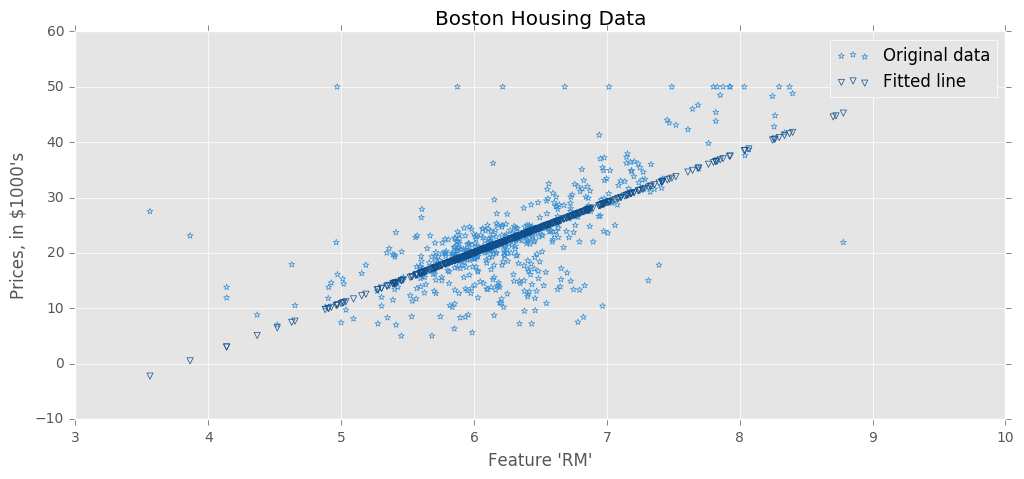

In [55]:
hide_code
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
x, y = np.array([[v,1] for v in boston_data.data[:,5]]), boston_data.target
(slope,bias),total_error,_,_ = np.linalg.lstsq(x,y)
y_lin = boston_data.data[:,5] * slope + bias
plt.scatter(boston_data.data[:,5], y, color='#338DD4', marker='*', facecolors='none', label='Original data')
plt.scatter(boston_data.data[:,5], y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'RM'")
plt.ylabel("Prices, in $1000's")
plt.title('Boston Housing Data')
plt.legend()

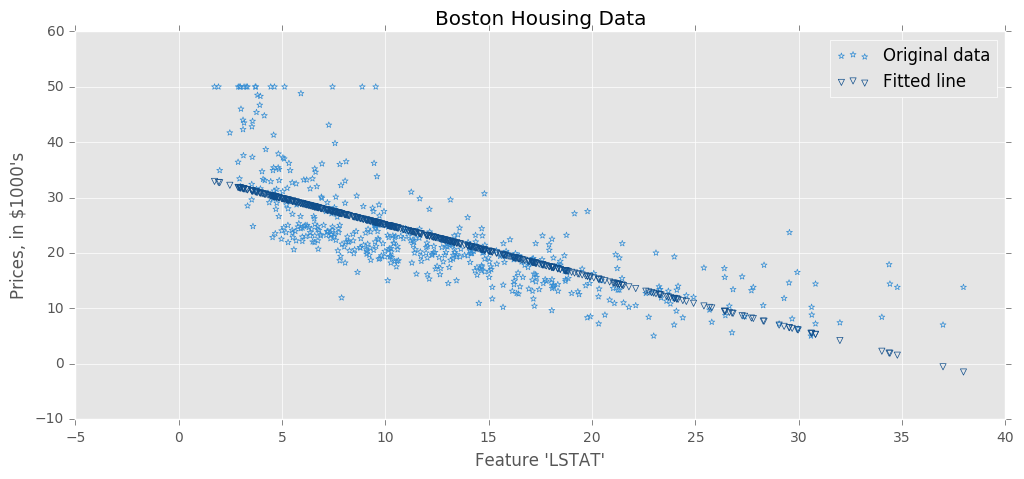

In [56]:
x, y = np.array([[v,1] for v in boston_data.data[:,12]]), boston_data.target
(slope,bias),total_error,_,_ = np.linalg.lstsq(x,y)
y_lin = boston_data.data[:,12] * slope + bias
plt.figure(figsize=(12,5))
plt.scatter(boston_data.data[:,12], y, color='#338DD4', marker='*', facecolors='none', label='Original data')
plt.scatter(boston_data.data[:,12], y_lin, color='#104E8B', marker='v', facecolors='none', label='Fitted line')
plt.xlabel("Feature 'LSTAT'")
plt.ylabel("Prices, in $1000's")
plt.title('Boston Housing Data')
plt.legend()

#### Question 2
Using your set ***client_features***, which values correspond with the features you've chosen above?

#### Answer 2

In [57]:
hide_code
print ("Values of Client Features:")
for (i,j) in [(5, 'RAM'), (8, 'RAD'), (12, 'LSTAT')]:
    print (j, client_features[i])

Values of Client Features:
RAM 5.609
RAD 24
LSTAT 12.13


## $\mathfrak {\color{#338DD4} { 4. \ Data \ Splitting}}$
In this second section of the project, we will develop the tools necessary for a model to make a prediction. 

We will implement the ***shuffle_split_data*** function. It does the following steps.

- Randomly shuffle the input data X and target labels (housing values) y.
- Split the data into training and testing subsets, holding 30% of the data for testing.

In [133]:
hide_code
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(features, prices)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!


#### Question 3
Why do we split the data into training and testing subsets for our model?

#### Answer 3
We should not only build a predictive model but also assess the quality of it. Naturally, we would like to know how our predictions will be relatively close to the actual outcomes.

We usually split the data into training and testing subset exactly for this goal. The training set is used to choose the most effective parameters for given models, but what kind of model we should apply and how the concrete model works we can evaluate with the test set.

It helps to avoid overfitting, i.e. the cases when the built model will fit extremely well for the training sets but will not work with real data because of catching non-existing trends.

## $\mathfrak {\color{#338DD4} { 5. \ Performance \ Metric}}$
Next, we will implement the ***performance_metric*** function. 

It makes a total error calculation between the true values of the y labels ***y_true*** and the predicted values of the y labels ***y_predict***.

In [134]:
hide_code
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!")
    print (total_error)
except:
    print ("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation!
0.0


#### Question 4
Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?

- Accuracy
- Precision
- Recall
- F1 Score
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)

#### Answer 4
***Mean Squared Error (MSE)*** is a natural choice in this case because of some important reasons:

- compatible with regression problems acording the ***scikit-Learn*** documentation;
- considers all the deviations (both positive and negative);
- differentiable and allows to use calculus to find minimum or maximum values;
- sensitive to outliers (the squared deviation increases at a higher rate);
- is used to determine how well the model fits the data and how simplifying the model affects on the predictive ability.

## $\mathfrak {\color{#338DD4} { 6. \ Model \ Fitting}}$

In [142]:
hide_code
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn import svm, grid_search, datasets

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better = False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters, scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(features, prices)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


#### Question 5
What is the grid search algorithm and when is it applicable?

#### Answer 5

#### Question 6
What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

#### Answer 6

## $\mathfrak {\color{#338DD4} { 7. \ Checkpoint }}$

In [152]:
hide_code
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 4, 5, 7 and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(12,12))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,4,5,7,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(3, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [153]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(12,4))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

## $\mathfrak {\color{#338DD4} {8. \ Analyzing \ Model \ Performance}}$

Creating learning curve graphs for max_depths of 1, 3, 4, 5, 7 and 10. . .


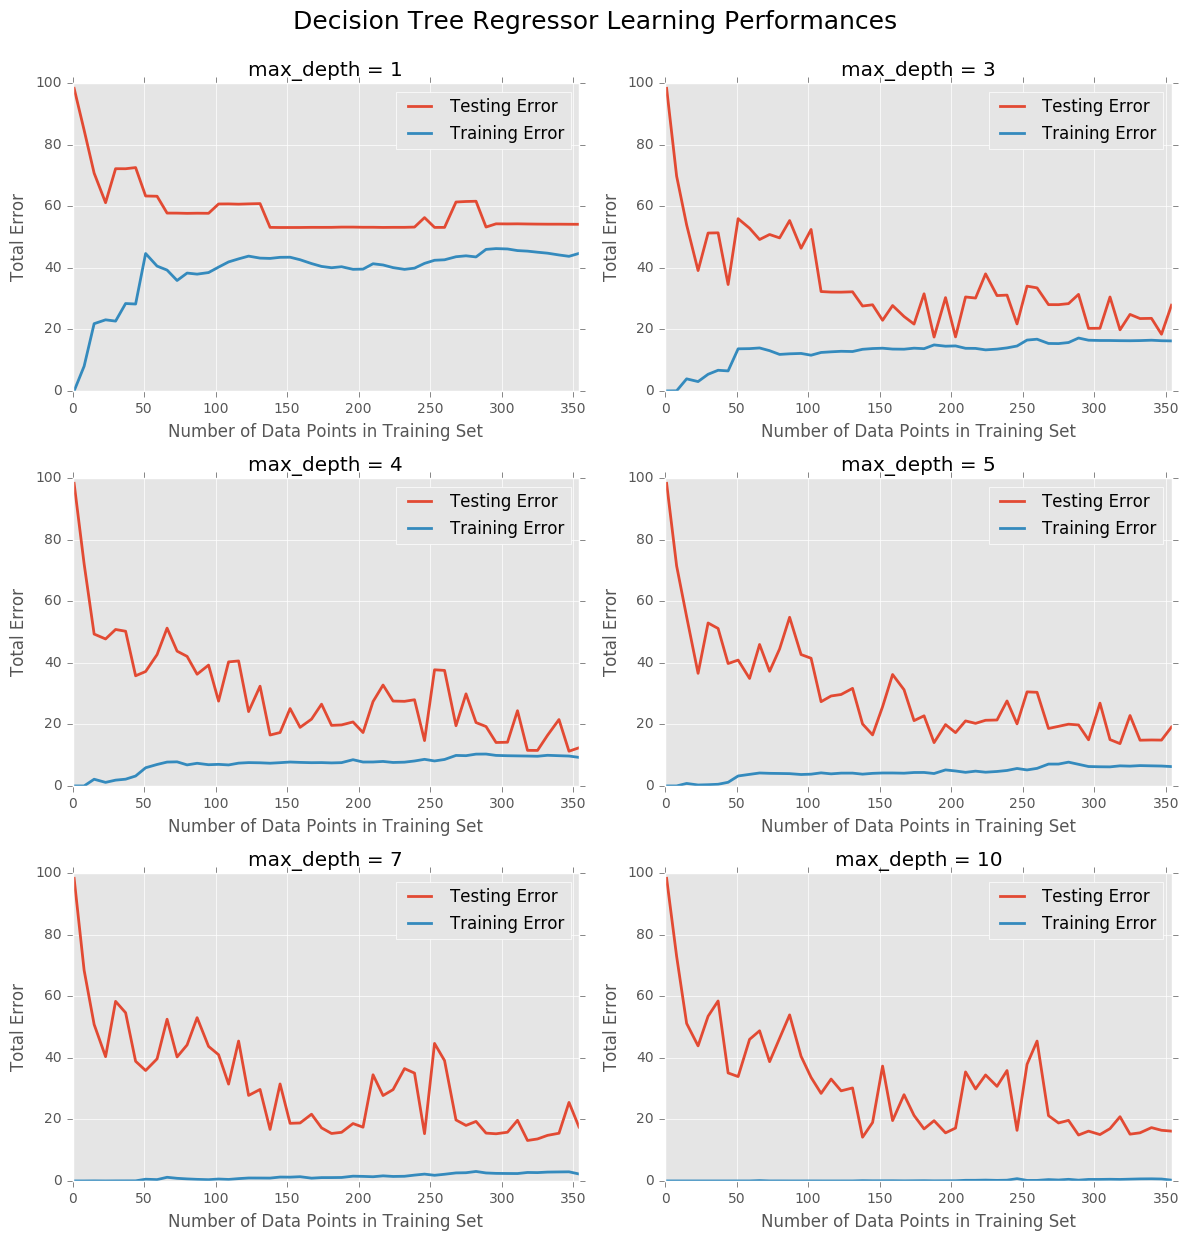

In [154]:
hide_code
warnings.filterwarnings('ignore')
learning_curves(X_train, y_train, X_test, y_test)

#### Question 7
Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?

#### Answer 7

#### Question 8
Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?

#### Answer 8

Creating a model complexity graph. . . 


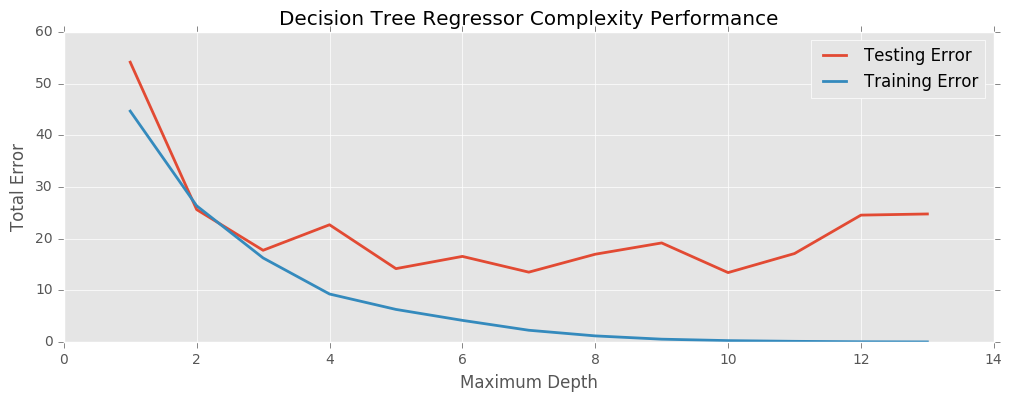

In [155]:
hide_code
model_complexity(X_train, y_train, X_test, y_test)

#### Question 9
From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?

#### Answer 9

## $\mathfrak {\color{#338DD4} { 9. \ Model \ Prediction}}$

#### Question 10
Using grid search on the entire dataset, what is the optimal max_depth parameter for your model? How does this result compare to your intial intuition?

#### Answer 10

In [156]:
hide_code
print ("Optimal max_depth parameter is equal to", reg.get_params()['max_depth'])

Optimal max_depth parameter is equal to 4


#### Question 11
With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?

In [157]:
hide_code
sale_price = reg.predict(client_features)
print ("Predicted price of client's home: {0:.3f}".format(sale_price[0]))

Predicted price of client's home: 21.630


#### Answer 11

#### Question 12
In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.

#### Answer 12

## $\mathfrak {\color{#338DD4} { 10. \ Conclusion}}$